In [1]:
import pandas as pd
import scanpy as sc

import scrublet as scr


In [19]:
mf = pd.read_csv("data/GSE190622_count_matrix_Annotated.csv.gz", index_col=0)
adata = sc.AnnData(X=mf.T)
adata.obs["genotype"] = adata.obs_names.to_series().apply(lambda x: x.split("_")[0])
adata.obs["timepoint"] = adata.obs_names.to_series().apply(lambda x: x.split("_")[1])
adata.obs["sample"] = adata.obs["genotype"] + "_" + adata.obs["timepoint"]
adata.var_names_make_unique()

/Users/ireneroblesrebollo/anaconda3/envs/myscanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
scrub = scr.Scrublet(adata.X, expected_doublet_rate=0.06)
doublet_scores, predicted_doublets = scrub.scrub_doublets()

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.41
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 25.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.3%
Elapsed time: 37.0 seconds


(<Figure size 800x300 with 2 Axes>,
 array([<Axes: title={'center': 'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <Axes: title={'center': 'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

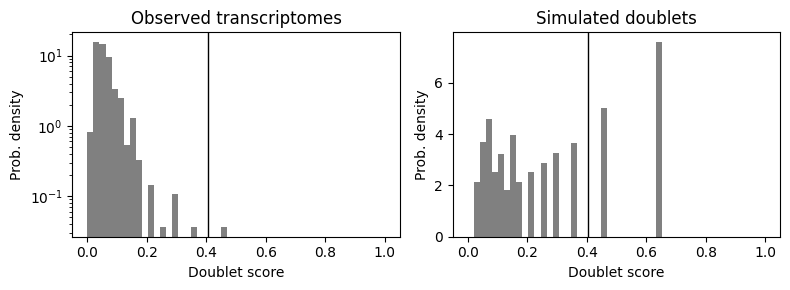

In [6]:

scrub.plot_histogram()


Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 50.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.4%
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.41
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 16.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.9%
Elapsed time: 16.8 seconds


(<Figure size 800x300 with 2 Axes>,
 array([<Axes: title={'center': 'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <Axes: title={'center': 'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

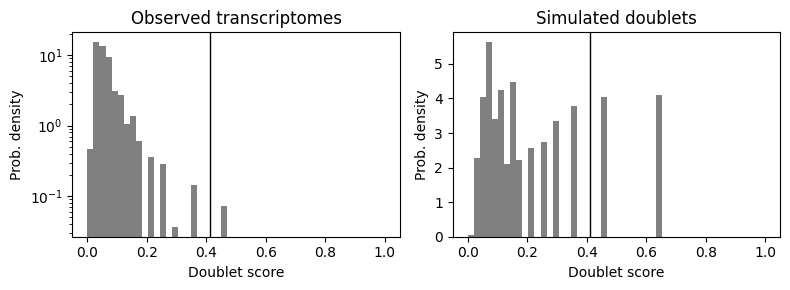

In [12]:
scrub.call_doublets(threshold=0.2)
doublet_scores, predicted_doublets = scrub.scrub_doublets()
scrub.plot_histogram()


/Users/ireneroblesrebollo/anaconda3/envs/myscanpy/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


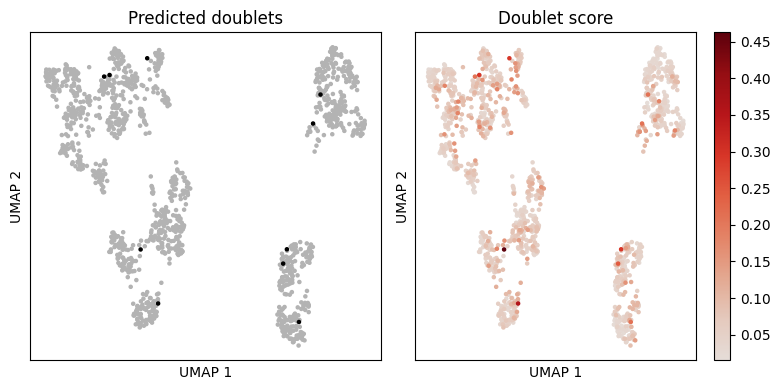

In [10]:
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
scrub.plot_embedding('UMAP', order_points=True);


In [13]:
doublet_scores, predicted_doublets = scrub.scrub_doublets()

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.41
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 7.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.1%
Elapsed time: 0.6 seconds


In [23]:
adata.obs["scrublet_doublet"] = predicted_doublets
adata = adata[adata.obs["scrublet_doublet"].apply(lambda x: x is False)]


View of AnnData object with n_obs × n_vars = 1360 × 18429
    obs: 'genotype', 'timepoint', 'sample', 'scrublet_doublet'